In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
files = [os.path.join("./outDatasets", item) for item in os.listdir("./outDatasets/")]
files

['./outDatasets\\keywords.csv',
 './outDatasets\\metadata_with_regions.csv',
 './outDatasets\\movies_metadata.csv',
 './outDatasets\\ratings.csv',
 './outDatasets\\regions.csv']

In [3]:
keywords = pd.read_csv('./outDatasets\\keywords.csv')
metadata = pd.read_csv('./outDatasets\\movies_metadata.csv')
review = pd.read_csv('./outDatasets\\ratings.csv')

In [4]:
keywords.head(3)

,id,keyID,key
0,862,931,jealousy
1,862,4290,toy
2,862,5202,boy


In [5]:
metadata.head(3)

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,vote_average,vote_count,genreID,genreName,production_companies_ID,production_companies_Name,production_countriesiso_3166_1,production_countriesname,spoken_languagesiso_639_1,spoken_languagesname
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,7.7,5415.0,16.0,Animation,3.0,Pixar Animation Studios,US,United States of America,en,English
1,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,7.7,5415.0,35.0,Comedy,3.0,Pixar Animation Studios,US,United States of America,en,English
2,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,7.7,5415.0,10751.0,Family,3.0,Pixar Animation Studios,US,United States of America,en,English


In [6]:
review.head(3)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523


In [7]:
print(f"Users :\nmin = {review['userId'].min()}, max = {review['userId'].max()}")
print(f"Movies :\nmin = {review['movieId'].min()}, max = {review['movieId'].max()}")

Users :
min = 1, max = 270896
Movies :
min = 1, max = 176275


In [8]:
review.userId = review.userId.astype('category').cat.codes.values
review.movieId = review.movieId.astype('category').cat.codes.values

In [9]:
review['userId'].max() * review['movieId'].max()

12221157030

In [10]:
metadata["genreName"].unique()

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Foreign', nan, 'Music',
       'Documentary', 'Western', 'TV Movie'], dtype=object)

In [11]:
len(metadata["genreName"].unique())

21

In [12]:
metadata["production_countriesiso_3166_1"].unique()

array(['US', 'DE', 'GB', 'FR', 'IT', 'ES', 'CN', 'AU', 'ZA', 'CA', nan,
       'CH', 'BE', 'JP', 'IR', 'NL', 'HK', 'TN', 'IE', 'DO', 'HR', 'RU',
       'MK', 'AT', 'TW', 'NZ', 'MX', 'PL', 'PE', 'CU', 'LI', 'DK', 'PT',
       'FI', 'SE', 'AR', 'IS', 'KR', 'RS', 'HU', 'CZ', 'IN', 'BR', 'GR',
       'CD', 'SN', 'BF', 'RO', 'PH', 'VN', 'TT', 'BG', 'CL', 'NO', 'KZ',
       'DZ', 'LU', 'GE', 'UA', 'BW', 'AW', 'IL', 'TR', 'EC', 'LB', 'MA',
       'BA', 'BS', 'MY', 'BT', 'JM', 'PK', 'NP', 'CI', 'TH', 'CM', 'CO',
       'XC', 'UY', 'SI', 'LY', 'PR', 'SU', 'XG', 'SG', 'AF', 'MT', 'PA',
       'EG', 'ZW', 'TJ', 'UZ', 'CR', 'KW', 'MQ', 'GH', 'AM', 'ID', 'MN',
       'BO', 'MC', 'IQ', 'SK', 'CS', 'VE', 'LT', 'RW', 'PS', 'TD', 'PY',
       'QA', 'EE', 'MO', 'ML', 'UM', 'LV', 'AE', 'AZ', 'KY', 'NI', 'LR',
       'YU', 'ME', 'AO', 'BY', 'KH', 'MR', 'CY', 'BD', 'SY', 'KG', 'AL',
       'TZ', 'KP', 'KE', 'JO', 'UG', 'SA', 'SO', 'GT', 'MG', 'ET', 'LK',
       'PG', 'NG', 'LA', 'PF', 'AN', 'CG', 'MM', 'BM

In [13]:
len(keywords["keyID"].unique())

19956

To Handle the diversity of the countries we can cluster them via regions or sub-regions to obtain a more dense representation
The information about the regions can be retrieved from the website [https://cloford.com/resources/codes/index.htm]

In [14]:
import requests
from bs4 import BeautifulSoup

def retrieve_table_from_website(url, table_class):
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the table with the specified class
        table = soup.find('table', class_=table_class)
        
        # Check if the table is found
        if table:
            # Extract the table data and return it
            table_data = []
            rows = table.find_all('tr')
            for row in rows:
                row_data = []
                cells = row.find_all(['th', 'td'])
                for cell in cells:
                    row_data.append(cell.get_text().strip())
                table_data.append(row_data)
            
            return table_data
        else:
            print("Table not found on the page.")
    else:
        print("Failed to retrieve data from the website.")

In [15]:
url = 'https://cloford.com/resources/codes/index.htm'
table_class = 'outlinetable'
table_data = retrieve_table_from_website(url, table_class)
if table_data:
    for row in table_data:
        print(row)

['Continent', 'Region', 'Country', 'Capital', 'FIPS', 'ISO (2)', 'ISO (3)', 'ISO (No)', 'Internet', 'Note']
['Asia', 'South Asia', 'Afghanistan', 'Kabul', 'AF', 'AF', 'AFG', '004', 'AF', '']
['Europe', 'South East Europe', 'Albania', 'Tirana', 'AL', 'AL', 'ALB', '008', 'AL', '']
['Africa', 'Northern Africa', 'Algeria', 'Algiers', 'AG', 'DZ', 'DZA', '012', 'DZ', '']
['Oceania', 'Pacific', 'American Samoa', 'Pago Pago', 'AQ', 'AS', 'ASM', '016', 'AS', '']
['Europe', 'South West Europe', 'Andorra', 'Andorra la Vella', 'AN', 'AD', 'AND', '020', 'AD', '']
['Africa', 'Southern Africa', 'Angola', 'Luanda', 'AO', 'AO', 'AGO', '024', 'AO', '']
['Americas', 'West Indies', 'Anguilla', 'The Valley', 'AV', 'AI', 'AIA', '660', 'AI', '']
['Americas', 'West Indies', 'Antigua and Barbuda', "Saint John's", 'AC', 'AG', 'ATG', '028', 'AG', '']
['Americas', 'South America', 'Argentina', 'Buenos Aires', 'AR', 'AR', 'ARG', '032', 'AR', '']
['Asia', 'South West Asia', 'Armenia', 'Yerevan', 'AM', 'AM', 'ARM', 

In [16]:
table_data = pd.DataFrame(table_data[1:], columns=table_data[0])

In [17]:
table_data.head()

,Continent,Region,Country,Capital,FIPS,ISO (2),ISO (3),ISO (No),Internet,Note
0,Asia,South Asia,Afghanistan,Kabul,AF,AF,AFG,004,AF,
1,Europe,South East Europe,Albania,Tirana,AL,AL,ALB,008,AL,
2,Africa,Northern Africa,Algeria,Algiers,AG,DZ,DZA,012,DZ,
3,Oceania,Pacific,American Samoa,Pago Pago,AQ,AS,ASM,016,AS,
4,Europe,South West Europe,Andorra,Andorra la Vella,AN,AD,AND,020,AD,


In [18]:
table_data.to_csv("./outDatasets/regions.csv")

In [19]:
table_data["Continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas'], dtype=object)

In [20]:
table_data["Region"].unique()

array(['South Asia', 'South East Europe', 'Northern Africa', 'Pacific',
       'South West Europe', 'Southern Africa', 'West Indies',
       'South America', 'South West Asia', 'Central Europe',
       'Eastern Europe', 'Western Europe', 'Central America',
       'Western Africa', 'South East Asia', 'Central Africa',
       'North America', 'East Asia', 'Indian Ocean', 'Northern Europe',
       'Eastern Africa', 'Southern Europe', 'Central Asia',
       'Northern Asia'], dtype=object)

In [21]:
len(table_data["Region"].unique())

24

In [22]:
metadata = pd.merge(metadata, 
                    table_data[["Continent", "Region", "Country", "ISO (2)"]], 
                    "left", 
                    left_on="production_countriesiso_3166_1",
                    right_on="ISO (2)",
                   )

In [23]:
metadata.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'title', 'vote_average', 'vote_count', 'genreID',
       'genreName', 'production_companies_ID', 'production_companies_Name',
       'production_countriesiso_3166_1', 'production_countriesname',
       'spoken_languagesiso_639_1', 'spoken_languagesname', 'Continent',
       'Region', 'Country', 'ISO (2)'],
      dtype='object')

In [24]:
metadata["Continent"].unique()

array(['Americas', 'Europe', 'Asia', 'Oceania', 'Africa', nan],
      dtype=object)

In [25]:
len(metadata["Region"].unique())

25

In [26]:
metadata.to_csv("./outDatasets/metadata_with_regions.csv", index=False)

In [27]:
metadata.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'title', 'vote_average', 'vote_count', 'genreID',
       'genreName', 'production_companies_ID', 'production_companies_Name',
       'production_countriesiso_3166_1', 'production_countriesname',
       'spoken_languagesiso_639_1', 'spoken_languagesname', 'Continent',
       'Region', 'Country', 'ISO (2)'],
      dtype='object')

### Adding number of languages attribute to metadata

In [28]:
mod_metadata = pd.merge(metadata,
                        metadata.groupby("id", as_index=False)["spoken_languagesname"].nunique(), 
                        "left", 
                        left_on="id",
                        right_on="id",
                       )

In [29]:
mod_metadata.head()

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,production_companies_Name,production_countriesiso_3166_1,production_countriesname,spoken_languagesiso_639_1,spoken_languagesname_x,Continent,Region,Country,ISO (2),spoken_languagesname_y
0,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,Pixar Animation Studios,US,United States of America,en,English,Americas,North America,United States,US,1
1,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,Pixar Animation Studios,US,United States of America,en,English,Americas,North America,United States,US,1
2,False,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,Pixar Animation Studios,US,United States of America,en,English,Americas,North America,United States,US,1
3,False,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,...,TriStar Pictures,US,United States of America,en,English,Americas,North America,United States,US,2
4,False,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,...,TriStar Pictures,US,United States of America,fr,Français,Americas,North America,United States,US,2


In [30]:
metadata.groupby("id", as_index=False)["spoken_languagesname"].nunique()

,id,spoken_languagesname
0,2,2
1,3,3
2,5,1
3,6,1
4,11,1
...,...,...
45316,465044,1
45317,467731,1
45318,468343,0
45319,468707,1


In [31]:
metadata[metadata["id"] == 3]

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,production_companies_ID,production_companies_Name,production_countriesiso_3166_1,production_countriesname,spoken_languagesiso_639_1,spoken_languagesname,Continent,Region,Country,ISO (2)
163959,False,0,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.29211,1986-10-16,0.0,...,2303.0,Villealfa Filmproduction Oy,FI,Finland,en,English,Europe,Northern Europe,Finland,FI
163960,False,0,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.29211,1986-10-16,0.0,...,2303.0,Villealfa Filmproduction Oy,FI,Finland,fi,suomi,Europe,Northern Europe,Finland,FI
163961,False,0,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.29211,1986-10-16,0.0,...,2303.0,Villealfa Filmproduction Oy,FI,Finland,sv,svenska,Europe,Northern Europe,Finland,FI
163962,False,0,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.29211,1986-10-16,0.0,...,2303.0,Villealfa Filmproduction Oy,FI,Finland,en,English,Europe,Northern Europe,Finland,FI
163963,False,0,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.29211,1986-10-16,0.0,...,2303.0,Villealfa Filmproduction Oy,FI,Finland,fi,suomi,Europe,Northern Europe,Finland,FI
163964,False,0,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",2.29211,1986-10-16,0.0,...,2303.0,Villealfa Filmproduction Oy,FI,Finland,sv,svenska,Europe,Northern Europe,Finland,FI


In [32]:
mod_metadata.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'title', 'vote_average', 'vote_count', 'genreID',
       'genreName', 'production_companies_ID', 'production_companies_Name',
       'production_countriesiso_3166_1', 'production_countriesname',
       'spoken_languagesiso_639_1', 'spoken_languagesname_x', 'Continent',
       'Region', 'Country', 'ISO (2)', 'spoken_languagesname_y'],
      dtype='object')

In [33]:
column_names = {
    'production_countriesiso_3166_1': "countries_iso3166", 
    "production_countriesname": "production_countries_name", 
    "spoken_languagesiso_639_1": "spoken_languages_iso_639_1", 
    'spoken_languagesname_x': "spoken_languages_name",
    'Continent': "continent", 
    'Region': 'region', 
    'Country': 'country', 
    'ISO (2)': "countries_iso3166_2",
    "spoken_languagesname_y": "no. spoken_languages"
}

In [34]:
mod_metadata.rename(columns=column_names, inplace=True)

In [35]:
mod_metadata.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'title', 'vote_average', 'vote_count', 'genreID',
       'genreName', 'production_companies_ID', 'production_companies_Name',
       'countries_iso3166', 'production_countries_name',
       'spoken_languages_iso_639_1', 'spoken_languages_name', 'continent',
       'region', 'country', 'countries_iso3166_2', 'no. spoken_languages'],
      dtype='object')

In [36]:
mod_metadata.to_csv("outDatasets/cleaned_metadata.csv", index=False)

# Movies Features To NumPy

<table>
<tr>
    <th>Attribute</th>
    <th>data type</th>
    <th>Notes</th>
</tr>
<tr>
    <td>adult</td>
    <td>binary</td>
    <td></td>
</tr>
<tr>
    <td>budget</td>
    <td>numeric</td>
    <td>requires Imputation</td>
</tr>
<tr>
    <td>original_language</td>
    <td>?</td>
    <td>sparse (unique values=89)</td>
</tr>
<tr>    
    <td>original_title</td>
    <td>?</td>
    <td>almost a unique identifier</td>
</tr>
<tr>    
    <td>overview</td>
    <td>?</td>
    <td>Textual content</td>
</tr>
<tr>    
    <td>popularity</td>
    <td>numeric</td>
    <td></td>
</tr>
<tr>    
    <td>release_date</td>
    <td>ordinal</td>
    <td></td>
</tr>
<tr>    
    <td>runtime</td>
    <td>numeric</td>
    <td></td>
</tr>
<tr>    
    <td>vote_average, Revenue, vote_count</td>
    <td>numeric</td>
    <td> Adding them migh support cold start</td>
</tr>
<tr>    
    <td>genreName</td>
    <td>categorical</td>
    <td>21 unique values</td>
</tr>
<tr>    
    <td>production companies</td>
    <td>?</td>
    <td>Sparse (23685 unique values)</td>
</tr>
<tr>    
    <td>production_countriesname</td>
    <td>categorical</td>
    <td>Sparse (161 countries)</td>
</tr>
<tr>    
    <td>number of spoken languages</td>
    <td>numeric</td>
    <td></td>
</tr>
<tr>    
    <td>Continent / Region</td>
    <td>Categorical</td>
    <td>5 / 25 unique values</td>
</tr>
</table>

In [37]:
final_movies_features = pd.read_csv("./outDatasets/cleaned_metadata.csv")

In [38]:
final_movies_features.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'title', 'vote_average', 'vote_count', 'genreID',
       'genreName', 'production_companies_ID', 'production_companies_Name',
       'countries_iso3166', 'production_countries_name',
       'spoken_languages_iso_639_1', 'spoken_languages_name', 'continent',
       'region', 'country', 'countries_iso3166_2', 'no. spoken_languages'],
      dtype='object')

In [80]:
self_features = final_movies_features[['adult', 
                                       'budget', 
                                       'id', 
                                       'original_language', 
                                       'popularity', 
                                       'release_date', 
                                       'runtime', 
                                       'vote_average', 
                                       'vote_count', 
                                       'genreName', 
                                       'region',
                                       'continent',
                                       'no. spoken_languages'
                                      ]]

In [81]:
self_features.head()

,adult,budget,id,original_language,popularity,release_date,runtime,vote_average,vote_count,genreName,region,continent,no. spoken_languages
0,False,30000000,862,en,21.946943,1995-10-30,81.0,7.7,5415.0,Animation,North America,Americas,1
1,False,30000000,862,en,21.946943,1995-10-30,81.0,7.7,5415.0,Comedy,North America,Americas,1
2,False,30000000,862,en,21.946943,1995-10-30,81.0,7.7,5415.0,Family,North America,Americas,1
3,False,65000000,8844,en,17.015539,1995-12-15,104.0,6.9,2413.0,Adventure,North America,Americas,2
4,False,65000000,8844,en,17.015539,1995-12-15,104.0,6.9,2413.0,Adventure,North America,Americas,2


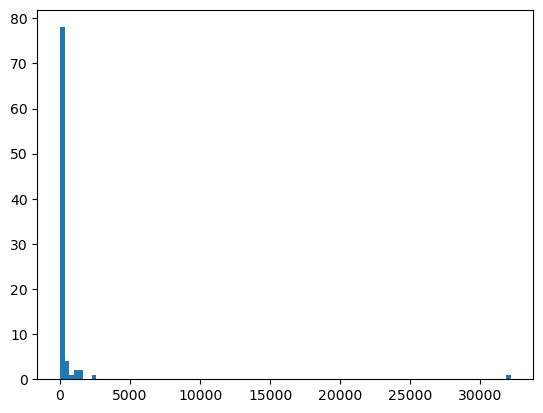

In [82]:
plt.hist(self_features.groupby("original_language")["id"].nunique(), bins = 100)
plt.show()

In [83]:
self_features[self_features["original_language"]!="en"].groupby("original_language")["id"].nunique().quantile([0, 0.1, 0.25, 0.5, 0.75, 0.9, 1])

0.00       1.00
0.10       1.00
0.25       2.00
0.50      11.00
0.75      83.25
0.90     390.50
1.00    2434.00
Name: id, dtype: float64

#### Encode each language with its proportion on the dataset & Saving this value

In [84]:
data = self_features.groupby("original_language", as_index=False)["id"].nunique()
data.rename(columns={"id": "lang_probability"}, inplace=True)
data["lang_probability"] = data["lang_probability"] / sum(data["lang_probability"])
data.head()

,original_language,lang_probability
0,ab,0.000221
1,af,0.000044
2,am,0.000044
3,ar,0.000861
4,ay,0.000022


In [85]:
data.to_csv("./outDatasets/lang_prob.csv", index=False)

In [86]:
self_features = pd.merge(self_features, 
                         data,
                         "left", 
                        left_on="original_language",
                        right_on="original_language",
                       )

self_features.head()

,adult,budget,id,original_language,popularity,release_date,runtime,vote_average,vote_count,genreName,region,continent,no. spoken_languages,lang_probability
0,False,30000000,862,en,21.946943,1995-10-30,81.0,7.7,5415.0,Animation,North America,Americas,1,0.709914
1,False,30000000,862,en,21.946943,1995-10-30,81.0,7.7,5415.0,Comedy,North America,Americas,1,0.709914
2,False,30000000,862,en,21.946943,1995-10-30,81.0,7.7,5415.0,Family,North America,Americas,1,0.709914
3,False,65000000,8844,en,17.015539,1995-12-15,104.0,6.9,2413.0,Adventure,North America,Americas,2,0.709914
4,False,65000000,8844,en,17.015539,1995-12-15,104.0,6.9,2413.0,Adventure,North America,Americas,2,0.709914


### Fixing Dates

In [97]:
val = set()
for item in self_features["release_date"]:
    val.add(item[:4])
print(val)

{'1918', '1926', '1917', '1983', '1990', '1929', '1984', '1957', '1977', '1916', '1945', '1992', '1964', '1913', '1908', '1939', '1891', '1909', '1944', '1973', '1969', '2018', '2008', '1970', '1966', '1934', '1900', '2011', '1890', '1897', '1996', '1935', '1931', '1883', '1980', '2013', '1903', '1998', '1906', '1930', '1895', '1943', '1993', '1874', '1981', '2014', '1910', '1892', '1902', '1904', '1923', '1985', '2020', '1961', '1999', '2002', '1927', '1887', '1997', '1958', '1912', '1922', '1933', '1896', '1986', '1893', '1979', '1937', '1963', '1952', '2012', '1920', '1928', '1972', '1960', '1911', '1982', '1948', '2015', '2005', '1975', '1991', '2007', '1940', '1967', '1946', '2016', '1942', '1898', '1959', '1953', '2010', '1947', '1878', '1971', '1894', '1988', '1995', '1965', '1899', '1956', '2004', '1949', '1914', '1974', '1938', '1932', '1941', '1905', '1901', '1888', '1919', '2001', '1989', '2017', '1936', '2000', '1921', '1987', '2003', '1907', '1951', '1968', '1915', '1994',

In [101]:
def fixing_dates(item):
    return int(item[:4])

self_features["release_date"] = self_features["release_date"].apply(fixing_dates)

### Fixing runtime

In [106]:
self_features["runtime"].mean()

108.76325024230242

In [109]:
self_features["runtime"] = self_features["runtime"].fillna(self_features["runtime"].mean())

In [111]:
len(self_features[self_features["runtime"].isna()])

0

In [112]:
self_features.head()

,adult,budget,id,original_language,popularity,release_date,runtime,vote_average,vote_count,genreName,region,continent,no. spoken_languages,lang_probability
0,False,30000000,862,en,21.946943,1995,81.0,7.7,5415.0,Animation,North America,Americas,1,0.709914
1,False,30000000,862,en,21.946943,1995,81.0,7.7,5415.0,Comedy,North America,Americas,1,0.709914
2,False,30000000,862,en,21.946943,1995,81.0,7.7,5415.0,Family,North America,Americas,1,0.709914
3,False,65000000,8844,en,17.015539,1995,104.0,6.9,2413.0,Adventure,North America,Americas,2,0.709914
4,False,65000000,8844,en,17.015539,1995,104.0,6.9,2413.0,Adventure,North America,Americas,2,0.709914


### Fixing Vote Count & Vote Avarage

In [113]:
self_features[self_features["vote_count"].isna()]

,adult,budget,id,original_language,popularity,release_date,runtime,vote_average,vote_count,genreName,region,continent,no. spoken_languages,lang_probability


In [115]:
self_features["vote_count"].quantile([0, 0.1, 0.25, 0.5, 0.75, 0.9, 1])

0.00        0.0
0.10        3.0
0.25        7.0
0.50       34.0
0.75      193.0
0.90      837.0
1.00    14075.0
Name: vote_count, dtype: float64

In [116]:
self_features[self_features["vote_count"] == 0]

,adult,budget,id,original_language,popularity,release_date,runtime,vote_average,vote_count,genreName,region,continent,no. spoken_languages,lang_probability
1380,False,0,188588,en,0.531159,1995,108.0,0.0,0.0,NaN,NaN,NaN,0,0.709914
1563,False,0,96357,en,0.001346,1995,110.0,0.0,0.0,Crime,NaN,NaN,0,0.709914
1763,False,0,290157,en,0.001178,1995,87.0,0.0,0.0,NaN,NaN,NaN,0,0.709914
1826,False,0,124636,en,0.001838,1995,87.0,0.0,0.0,Music,North America,Americas,1,0.709914
1827,False,0,124636,en,0.001838,1995,87.0,0.0,0.0,Documentary,North America,Americas,1,0.709914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419276,False,0,325439,en,0.093498,1961,93.0,0.0,0.0,NaN,NaN,NaN,1,0.709914
419356,False,0,276895,en,0.011025,1981,58.0,0.0,0.0,Documentary,North America,Americas,2,0.709914
419357,False,0,276895,en,0.011025,1981,58.0,0.0,0.0,Documentary,North America,Americas,2,0.709914
419429,False,0,227506,en,0.003503,1917,87.0,0.0,0.0,NaN,Northern Asia,Asia,0,0.709914


In [117]:
self_features[self_features["vote_average"].isna()]

,adult,budget,id,original_language,popularity,release_date,runtime,vote_average,vote_count,genreName,region,continent,no. spoken_languages,lang_probability


### One Hot Encoding the Genres, regions & Continents

In [130]:
ids = self_features[["id", "genreName"]]
ids = ids.drop_duplicates()
ids_hotEncoding = pd.get_dummies(ids["genreName"])

In [131]:
ids = pd.concat([ids, ids_hotEncoding], axis=1)

In [132]:
ids.drop(columns=["genreName"], inplace=True)

In [133]:
ids.head()

,id,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,862,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,862,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,862,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,8844,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,8844,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [135]:
ids = ids.groupby("id", as_index=False).sum()

In [137]:
ids.head()

,id,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,11,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [138]:
self_features.columns

Index(['adult', 'budget', 'id', 'original_language', 'popularity',
       'release_date', 'runtime', 'vote_average', 'vote_count', 'genreName',
       'region', 'continent', 'no. spoken_languages', 'lang_probability'],
      dtype='object')

In [139]:
ids_region = self_features[["id", "region"]]
ids_region = ids_region.drop_duplicates()
ids_region_hotEncoding = pd.get_dummies(ids_region["region"])
ids_region = pd.concat([ids_region, ids_region_hotEncoding], axis=1)
ids_region.drop(columns=["region"], inplace=True)
ids_region = ids_region.groupby("id", as_index=False).sum()
ids_region.head()

,id,Central Africa,Central America,Central Asia,Central Europe,East Asia,Eastern Africa,Eastern Europe,Indian Ocean,North America,...,South Asia,South East Asia,South East Europe,South West Asia,South West Europe,Southern Africa,Southern Europe,West Indies,Western Africa,Western Europe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,11,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [143]:
ids_continent = self_features[["id", "continent"]]
ids_continent = ids_continent.drop_duplicates()
ids_continent_hotEncoding = pd.get_dummies(ids_continent["continent"])
ids_continent = pd.concat([ids_continent, ids_continent_hotEncoding], axis=1)
ids_continent.drop(columns=["continent"], inplace=True)
ids_continent = ids_continent.groupby("id", as_index=False).sum()
ids_continent.head()

,id,Africa,Americas,Asia,Europe,Oceania
0,2,0,0,0,1,0
1,3,0,0,0,1,0
2,5,0,1,0,0,0
3,6,0,1,1,0,0
4,11,0,1,0,0,0


In [144]:
ids = pd.merge(ids, 
               ids_region,
               "outer", 
               left_on="id",
               right_on="id",
              )

In [146]:
ids = pd.merge(ids, 
               ids_continent,
               "outer", 
               left_on="id",
               right_on="id",
              )

In [147]:
ids.head()

,id,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Southern Africa,Southern Europe,West Indies,Western Africa,Western Europe,Africa,Americas,Asia,Europe,Oceania
0,2,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,6,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,11,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [148]:
self_features.columns

Index(['adult', 'budget', 'id', 'original_language', 'popularity',
       'release_date', 'runtime', 'vote_average', 'vote_count', 'genreName',
       'region', 'continent', 'no. spoken_languages', 'lang_probability'],
      dtype='object')

In [158]:
final_self_features = self_features.drop(columns=['genreName', 'region', 'continent', 'original_language'])

In [159]:
final_self_features.columns

Index(['adult', 'budget', 'id', 'popularity', 'release_date', 'runtime',
       'vote_average', 'vote_count', 'no. spoken_languages',
       'lang_probability'],
      dtype='object')

In [160]:
len(final_self_features)

419431

In [161]:
len(final_self_features["id"].unique())

45321

In [162]:
final_self_features = final_self_features.drop_duplicates()

In [163]:
len(final_self_features["id"])

45334

In [166]:
final_self_features[final_self_features.duplicated(subset='id', keep=False)]

,adult,budget,id,popularity,release_date,runtime,vote_average,vote_count,no. spoken_languages,lang_probability
10111,False,0,132641,0.096079,1953,89.0,0.0,0.0,1,0.029677
11046,False,4,22649,1.914697,1932,89.0,6.2,29.0,1,0.709914
29802,False,0,84198,0.501046,2012,84.0,6.9,7.0,1,0.709914
47552,False,16000000,10991,10.264597,2000,93.0,6.0,143.0,1,0.029677
50281,False,3512454,110428,0.134014,2013,95.0,7.0,20.0,1,0.053706
60673,False,26000000,15028,5.373623,2002,94.0,4.9,89.0,2,0.709914
66146,False,0,12600,7.072301,2001,75.0,5.7,82.0,1,0.029677
67999,False,0,109962,12.180836,1981,115.0,4.9,7.0,1,0.709914
69874,False,30000000,4912,11.331072,2002,113.0,6.6,281.0,1,0.709914
111582,False,10000000,69234,0.441872,1990,168.0,5.0,3.0,2,0.709914


In [169]:
final_self_features = final_self_features.drop_duplicates(subset='id', keep=False)

In [171]:
final_self_features

,adult,budget,id,popularity,release_date,runtime,vote_average,vote_count,no. spoken_languages,lang_probability
0,False,30000000,862,21.946943,1995,81.0,7.7,5415.0,1,0.709914
3,False,65000000,8844,17.015539,1995,104.0,6.9,2413.0,2,0.709914
21,False,0,15602,11.712900,1995,101.0,6.5,92.0,1,0.709914
25,False,16000000,31357,3.859495,1995,127.0,6.1,34.0,1,0.709914
28,False,0,11862,8.387519,1995,106.0,5.7,173.0,1,0.709914
...,...,...,...,...,...,...,...,...,...,...
419377,False,0,30840,5.683753,1991,104.0,5.7,26.0,1,0.709914
419425,False,0,111109,0.178241,2011,360.0,9.0,3.0,0,0.000507
419426,False,0,67758,0.903007,2003,90.0,3.8,6.0,1,0.709914
419429,False,0,227506,0.003503,1917,87.0,0.0,0.0,0,0.709914


In [172]:
final_self_features = pd.merge(final_self_features, 
                               ids,
                               "left", 
                               left_on="id",
                               right_on="id",
                              )

In [173]:
final_self_features

,adult,budget,id,popularity,release_date,runtime,vote_average,vote_count,no. spoken_languages,lang_probability,...,Southern Africa,Southern Europe,West Indies,Western Africa,Western Europe,Africa,Americas,Asia,Europe,Oceania
0,False,30000000,862,21.946943,1995,81.0,7.7,5415.0,1,0.709914,...,0,0,0,0,0,0,1,0,0,0
1,False,65000000,8844,17.015539,1995,104.0,6.9,2413.0,2,0.709914,...,0,0,0,0,0,0,1,0,0,0
2,False,0,15602,11.712900,1995,101.0,6.5,92.0,1,0.709914,...,0,0,0,0,0,0,1,0,0,0
3,False,16000000,31357,3.859495,1995,127.0,6.1,34.0,1,0.709914,...,0,0,0,0,0,0,1,0,0,0
4,False,0,11862,8.387519,1995,106.0,5.7,173.0,1,0.709914,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45303,False,0,30840,5.683753,1991,104.0,5.7,26.0,1,0.709914,...,0,0,0,0,1,0,1,0,1,0
45304,False,0,111109,0.178241,2011,360.0,9.0,3.0,0,0.000507,...,0,0,0,0,0,0,0,1,0,0
45305,False,0,67758,0.903007,2003,90.0,3.8,6.0,1,0.709914,...,0,0,0,0,0,0,1,0,0,0
45306,False,0,227506,0.003503,1917,87.0,0.0,0.0,0,0.709914,...,0,0,0,0,0,0,0,1,0,0


In [175]:
final_self_features.to_csv("./outDatasets/final/movies_features.csv", index=False)

In [176]:
keywords.to_csv("./outDatasets/final/keywords.csv", index=False)

In [ ]:
review.to_csv("./outDatasets/final/review.csv", index=False)